In [1]:
%load_ext autoreload
%autoreload 2

import pathlib
import pickle
import os

import numpy as np
import pandas as pd

from scipy import signal

import mne
from matplotlib import pyplot as plt

import constants
import dataset
import folders
import iter_topography_fork
import analysis_and_plotting_functions as aps


In [2]:
plt.rcParams['figure.figsize'] = [20,10]

In [3]:
# # Create dataset from raw data
# dataset.EpDatasetCreator(markup_path=folders.markup_path,
#                         database_path=folders.database_path_car_ica,
#                         data_folder=folders.data_folder,
#                         reference_mode='average', 
#                         ICA=True,
#                         fit_with_additional_lowpass=True
#                         )

In [4]:
# Load dataset into memory (if short of memory, use preload=False)
ds = dataset.DatasetReader(data_path=folders.database_path, preload=True)

99 percent complete

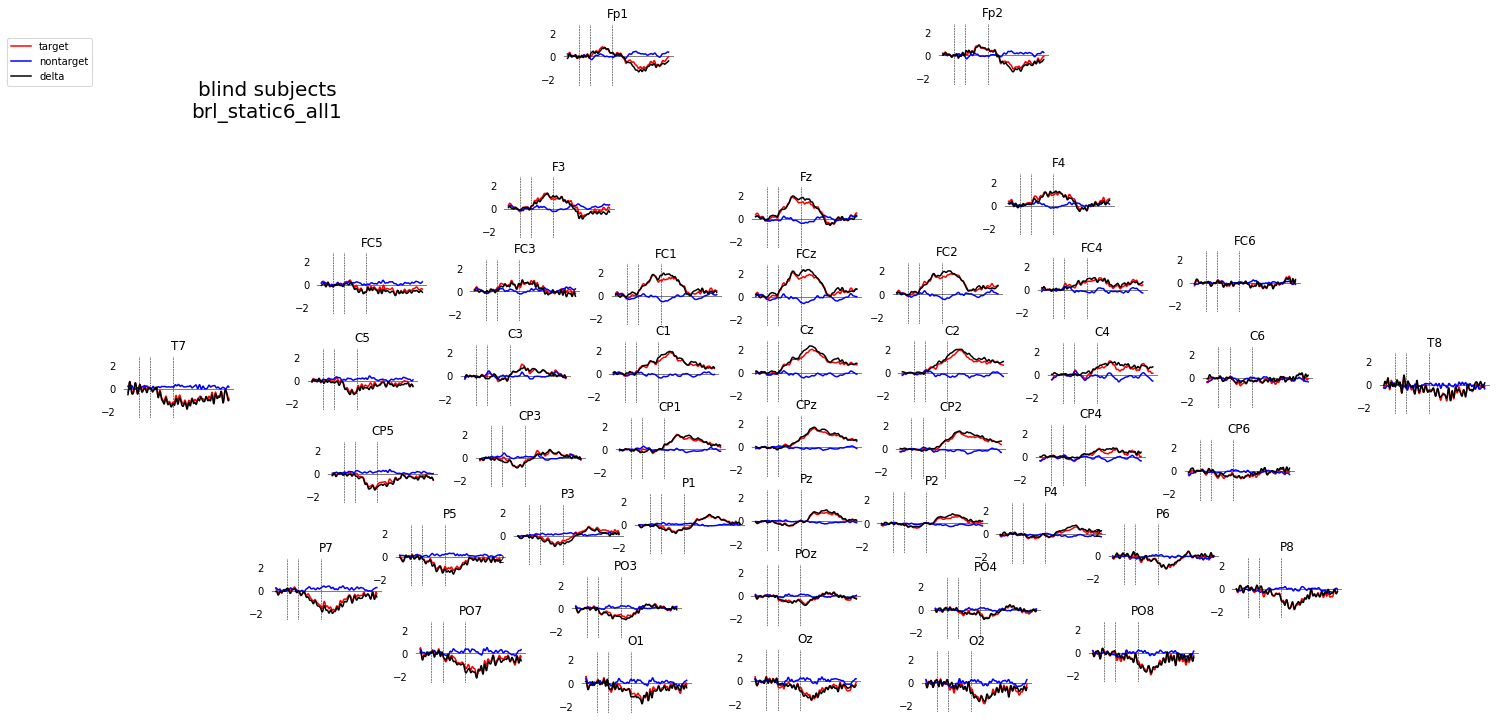

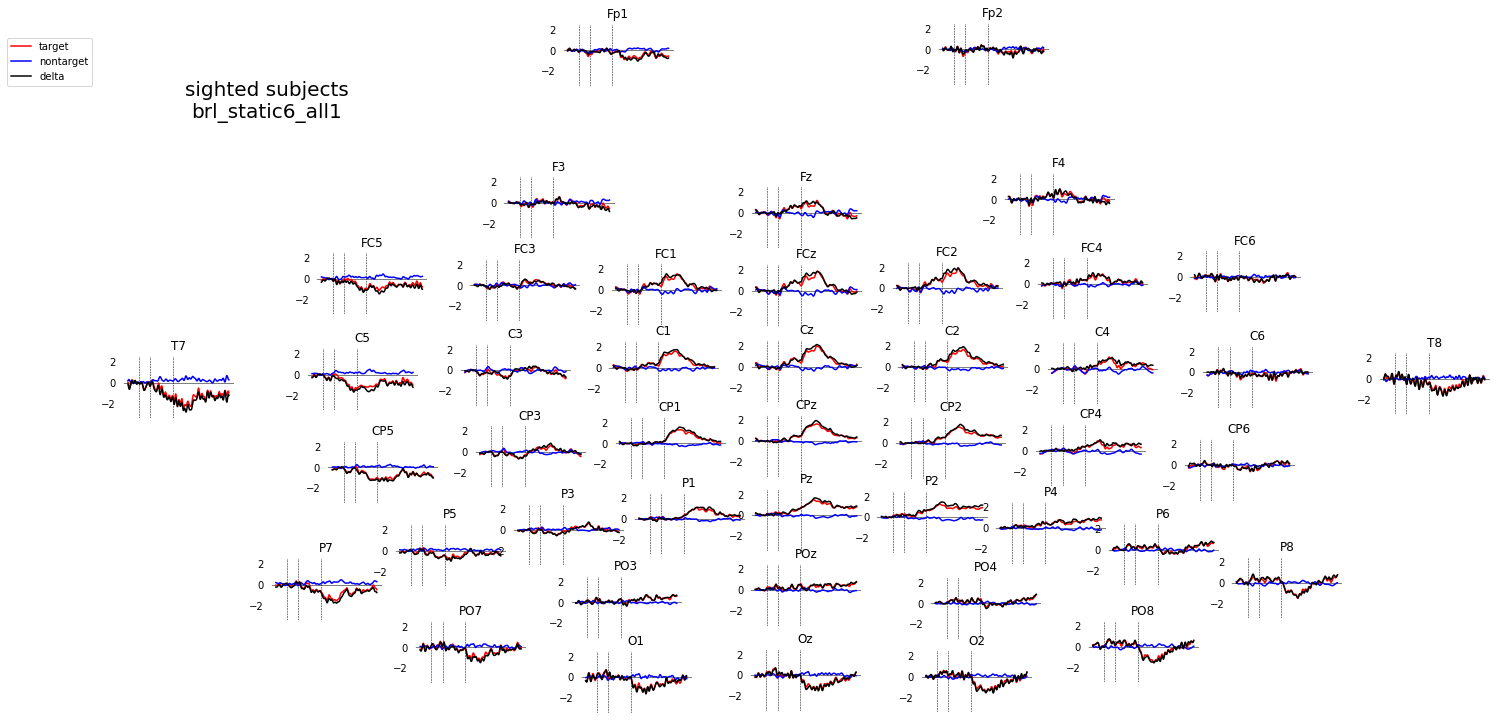

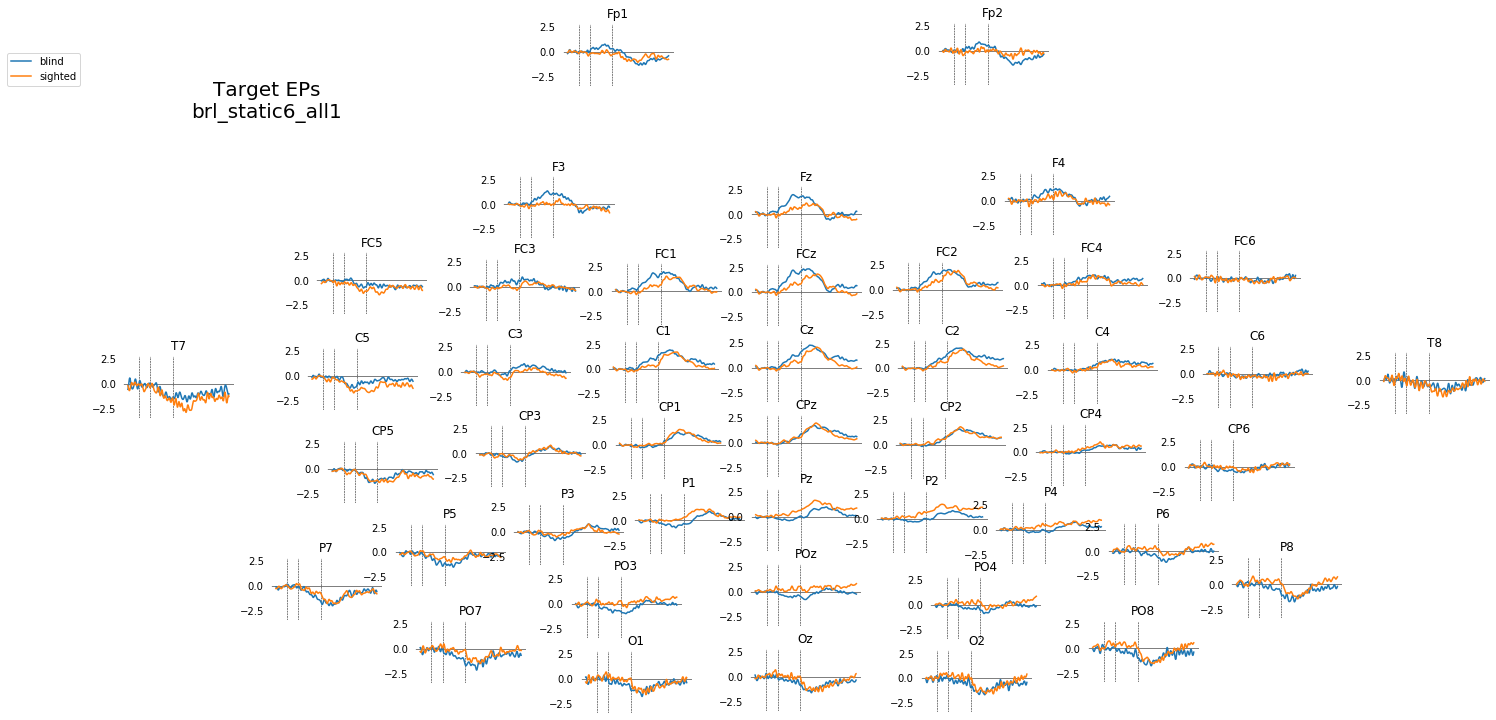

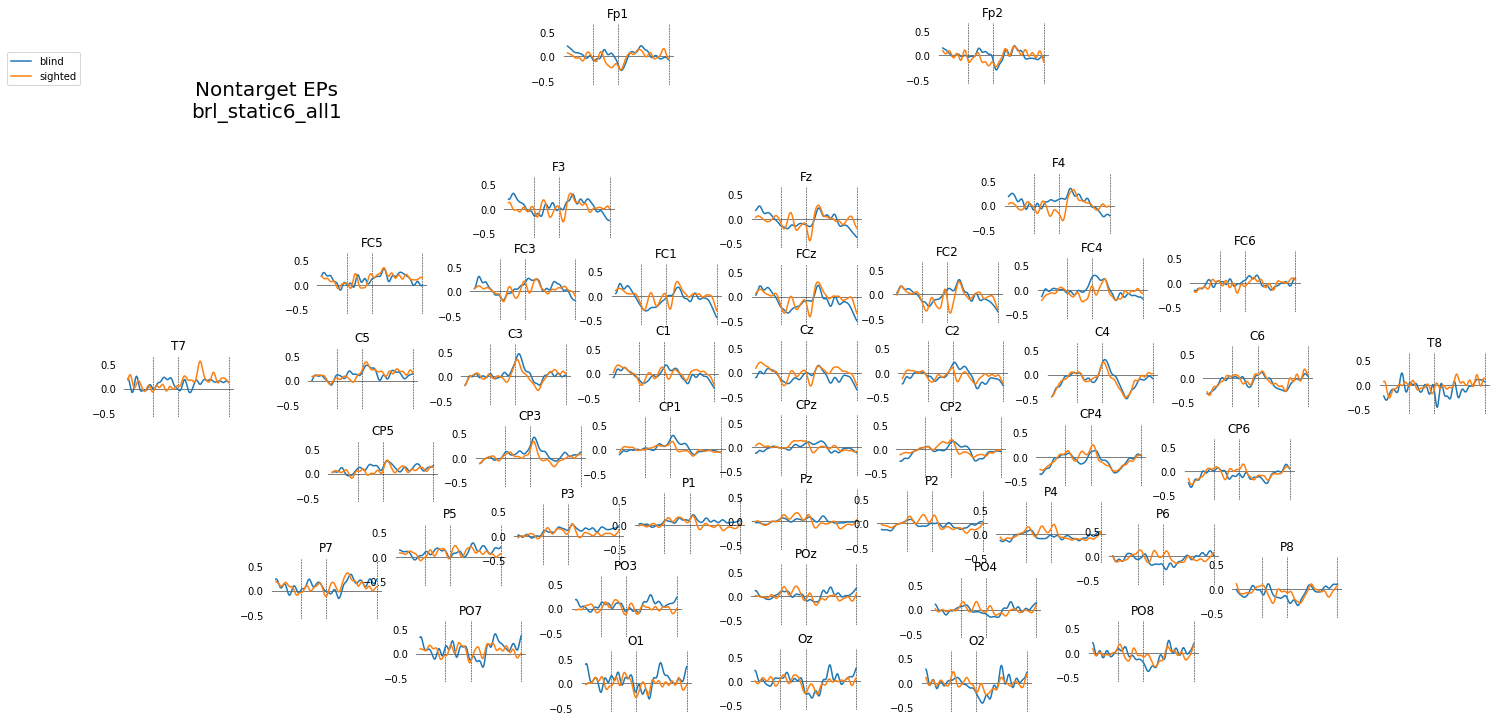

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


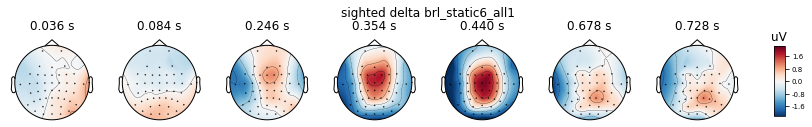

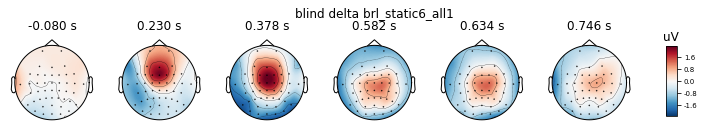

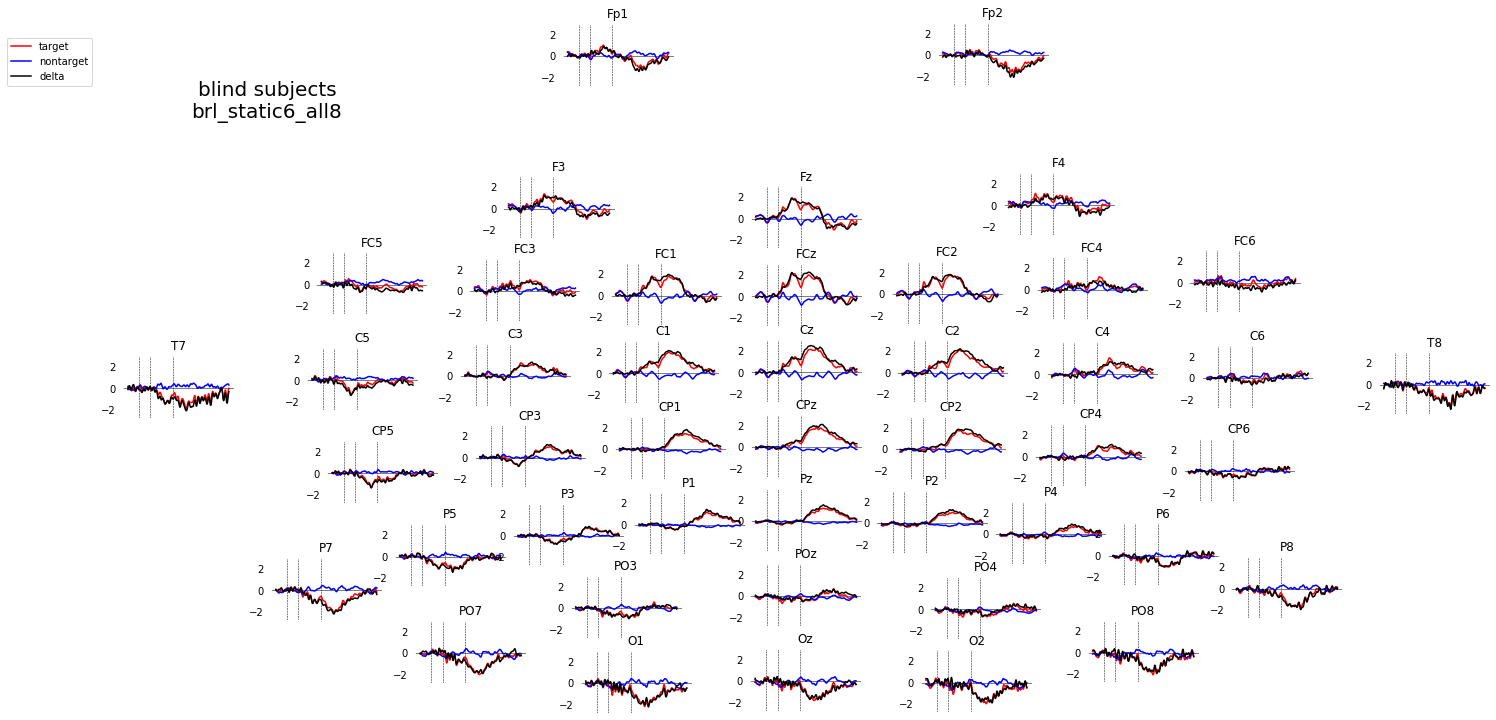

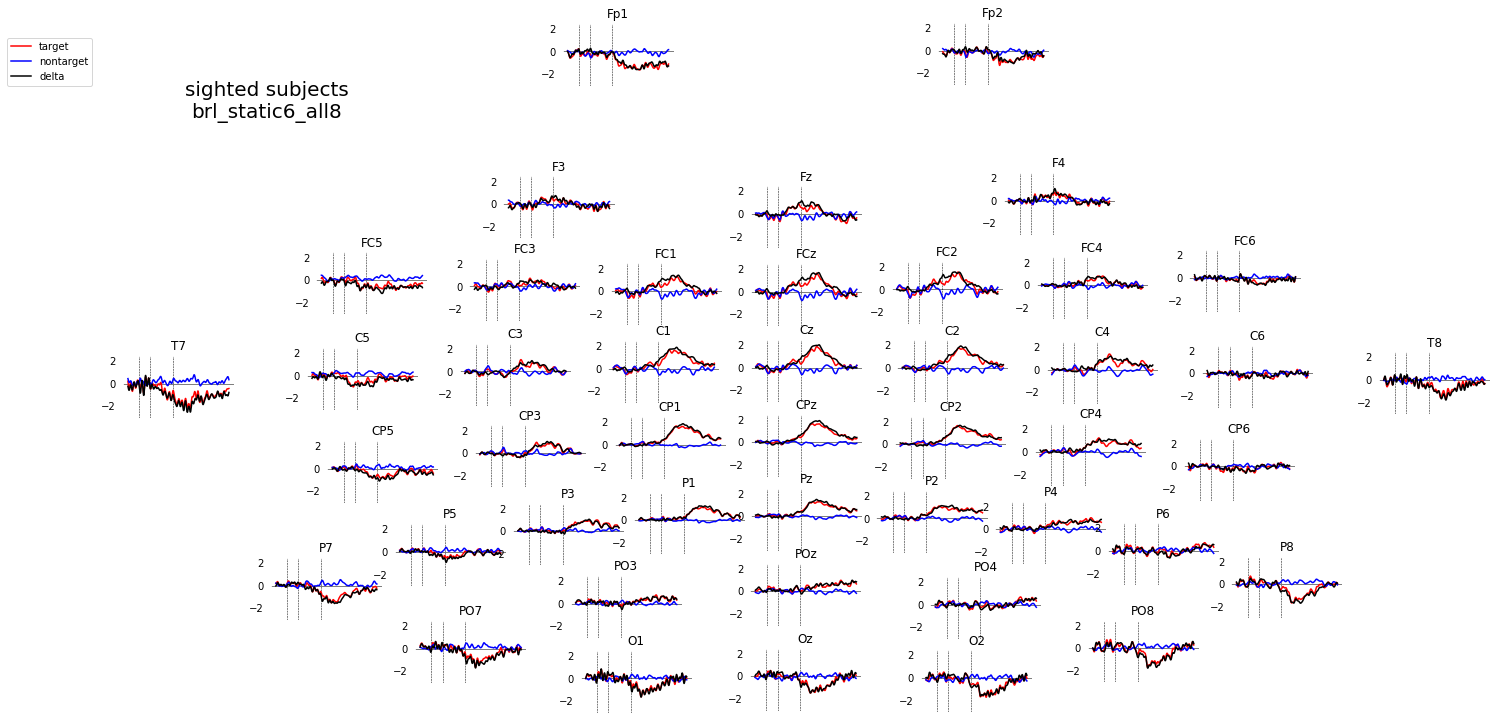

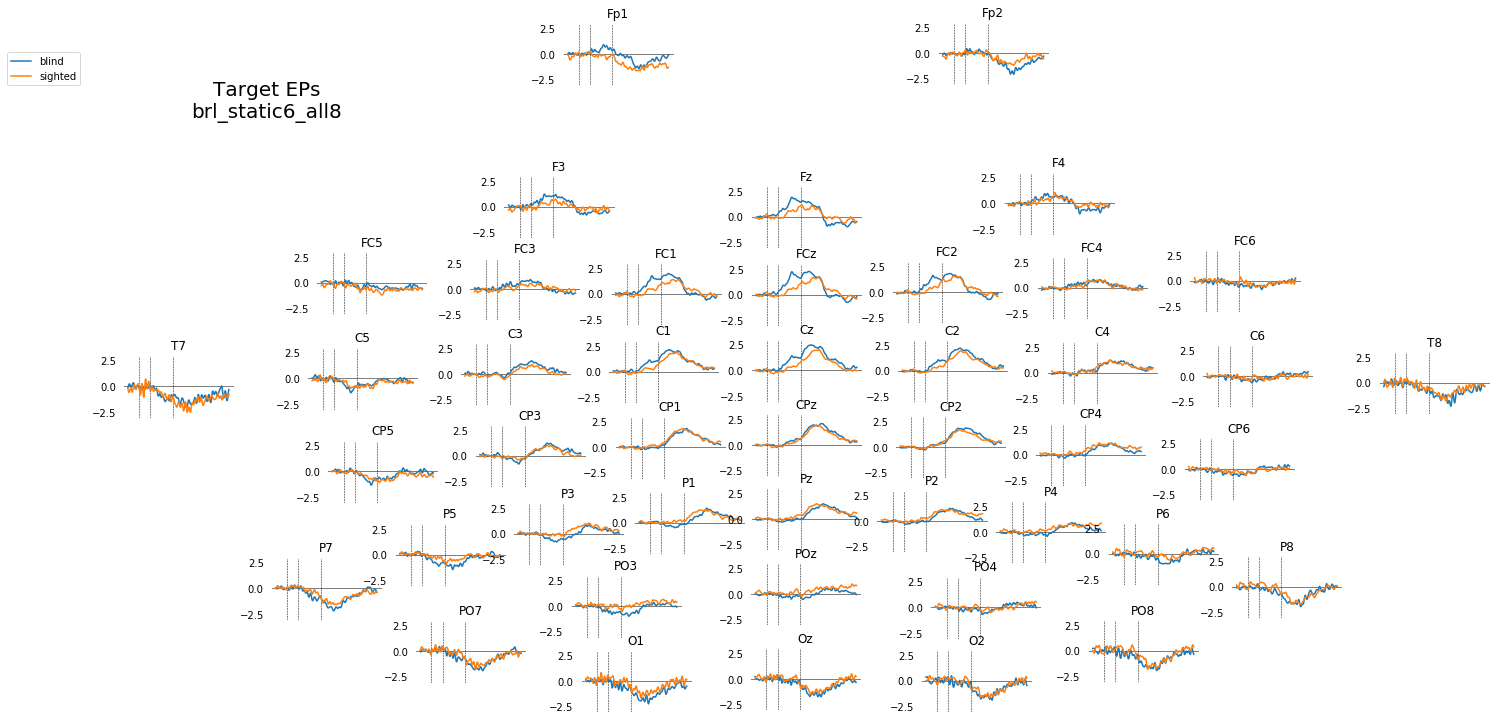

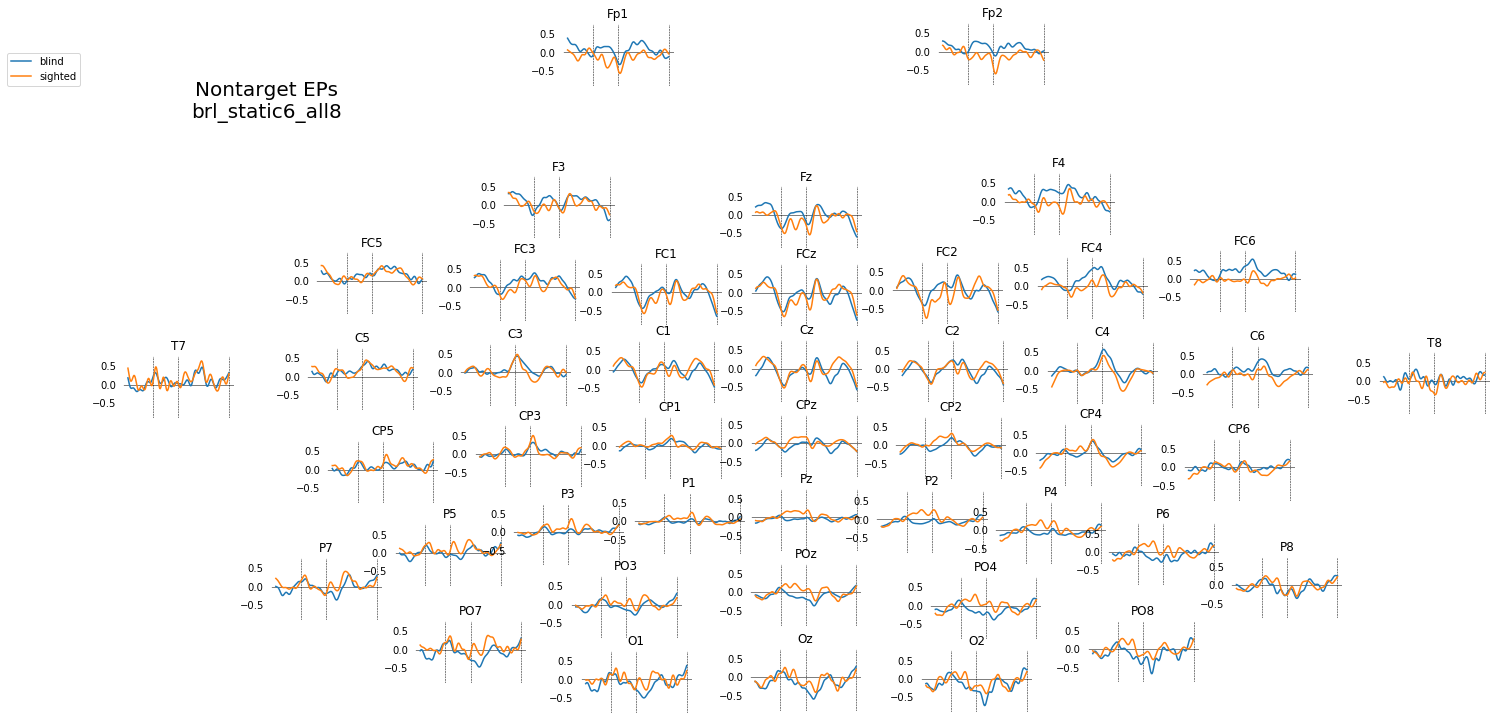

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


({'target': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=11197), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>},
 {'target': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=11200), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>})

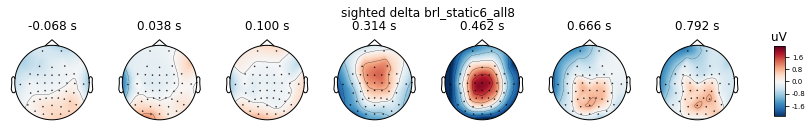

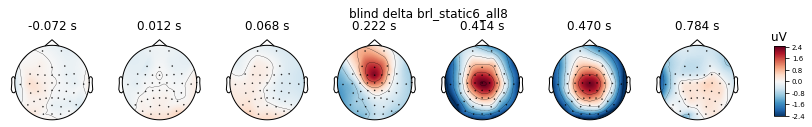

In [5]:
# blind vs sighted
def plot_single_reg(reg = 'brl_static6_all1', draw=True):
    subset_blind = ds.markup.loc[ (ds.markup['blind'] == 1) &
                                (ds.markup['reg'] == reg)
                                ]
    payload_blind = aps.subset(ds, subset_blind)

    subset_sighted = ds.markup.loc[ (ds.markup['blind'] == 0) &
                                (ds.markup['reg'] == reg)
                                ]
    payload_sighted = aps.subset(ds, subset_sighted)

    if draw:
        aps.plot_evoked_response(data=payload_blind, title=f'blind subjects\n{reg}')

        aps.plot_evoked_response(data=payload_sighted, title=f'sighted subjects\n{reg}')

        aps.plot_evoked_response(data={'blind': payload_blind['delta'],
                                    'sighted': payload_sighted['delta']},
                                        title=f'Target EPs\n{reg}')

        aps.plot_evoked_response(data = {'blind': payload_blind['nontarget'].crop(tmax=0.3),
                                        'sighted': payload_sighted['nontarget'].crop(tmax=0.3)
                                        },
                                        title=f'Nontarget EPs\n{reg}')


        p = payload_sighted['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'sighted delta {reg}')
        p.show()

        p = payload_blind['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'blind delta {reg}')
        p.show()

    return payload_blind, payload_sighted
plot_single_reg(reg = 'brl_static6_all1') #small
plot_single_reg(reg = 'brl_static6_all8') #large

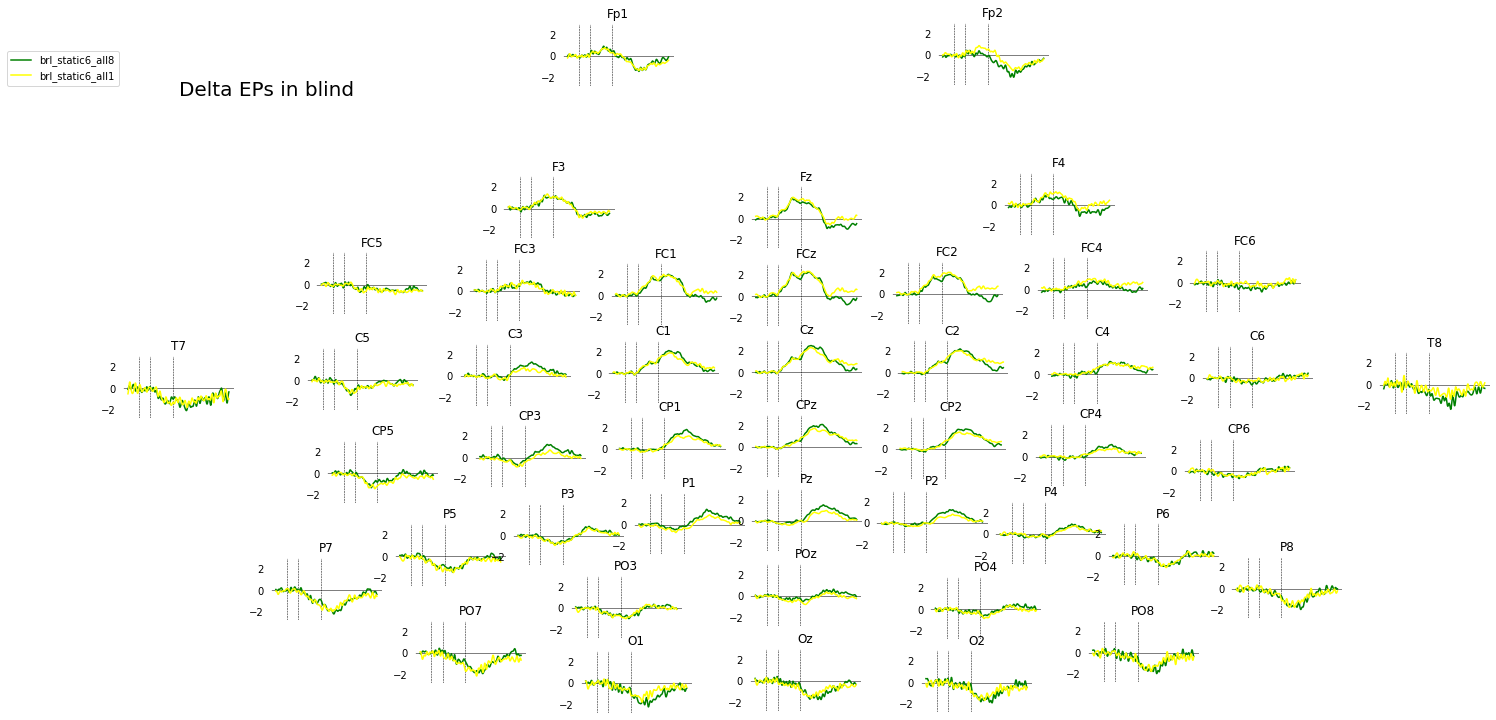

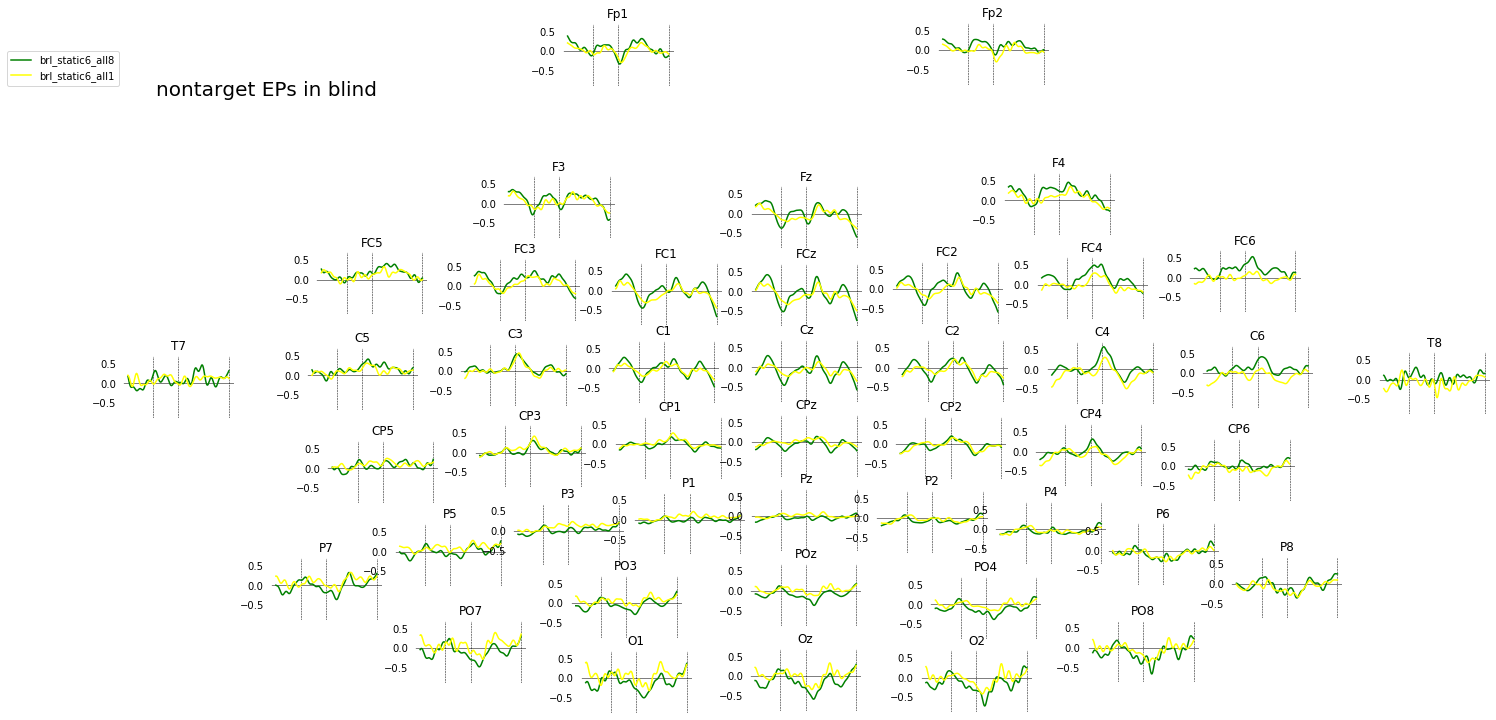

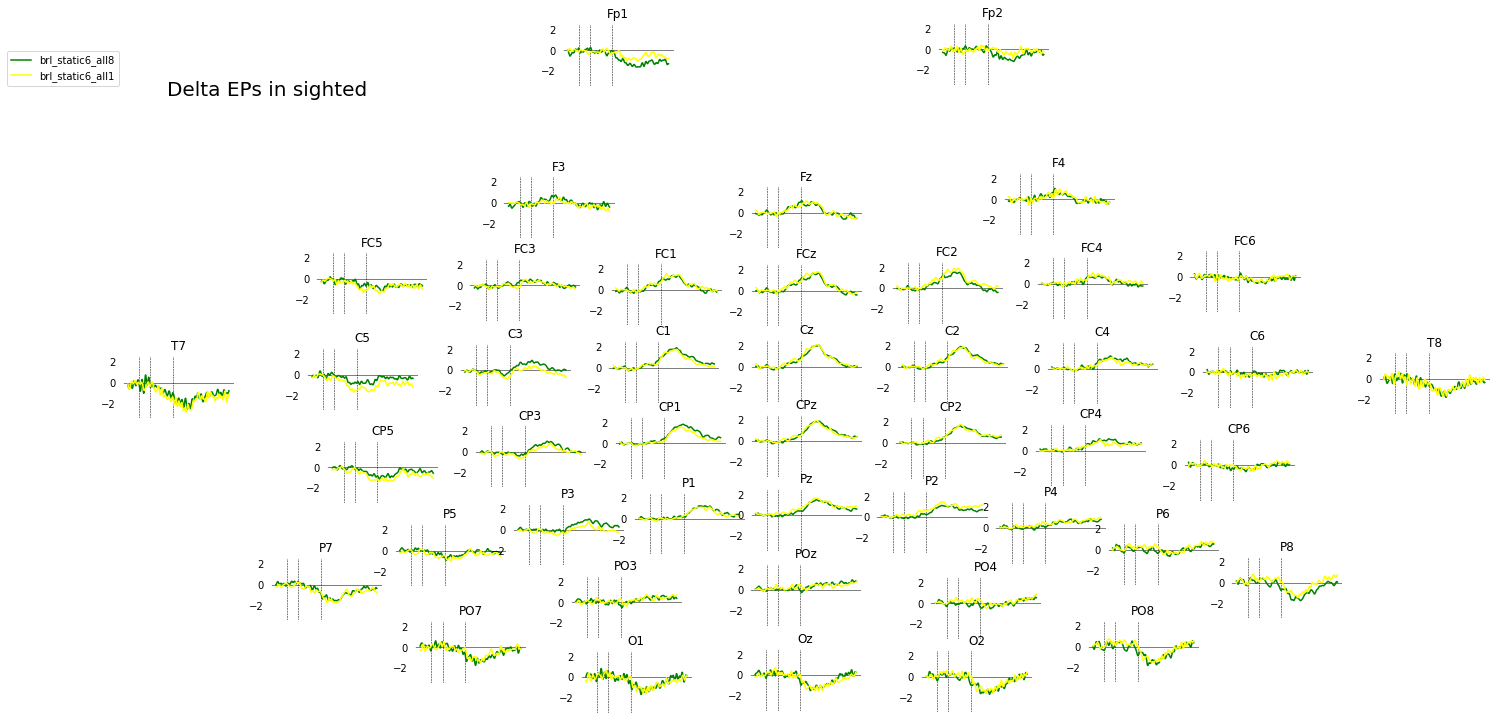

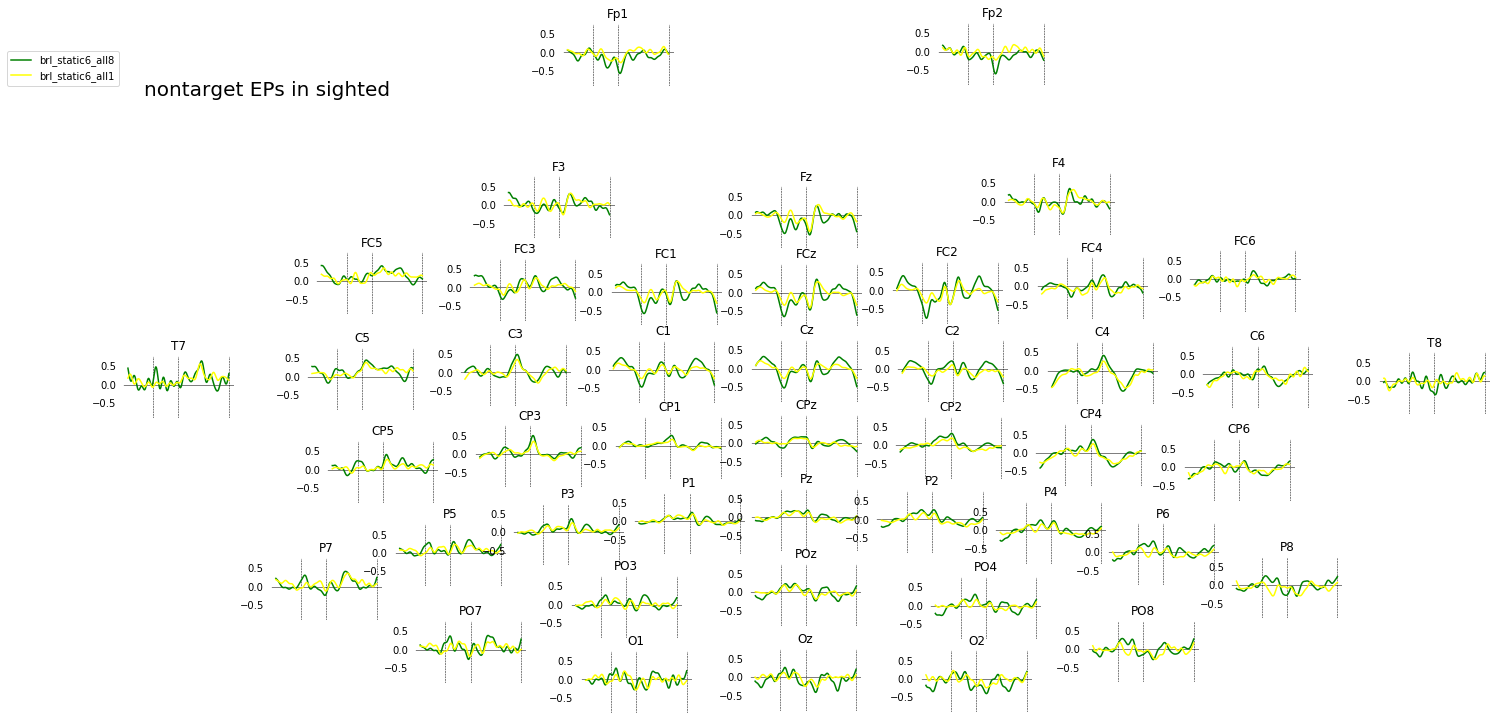

({'target': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=11200), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>},
 {'target': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=11200), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=1600), [-0.1, 0.8] sec, 45 ch, ~283 kB>})

In [6]:
# different stimulis in blind and sighted
def regs(demography = 'blind', draw=True):
    demographies = {'blind':1, 'sighted':0}
    regs = ['brl_static6_all8', 'brl_static6_all1']
    subset_r1 = ds.markup.loc[ (ds.markup['blind'] == demographies[demography]) &
                                (ds.markup['reg'] == regs[0])
                                ]
    payload_r1 = aps.subset(ds, subset_r1)

    subset_r2 = ds.markup.loc[ (ds.markup['blind'] == demographies[demography]) &
                                (ds.markup['reg'] == regs[1])
                                ]
    payload_r2 = aps.subset(ds, subset_r2)

    if draw:
        aps.plot_evoked_response(data={regs[0]: payload_r1['delta'],
                                    regs[1]: payload_r2['delta']},
                                        title=f'Delta EPs in {demography}')

        aps.plot_evoked_response(data={regs[0]: payload_r1['nontarget'].crop(tmax=0.3),
                                    regs[1]: payload_r2['nontarget'].crop(tmax=0.3)},
                                        title=f'nontarget EPs in {demography}')
    return payload_r1, payload_r2

regs(demography='blind')
regs(demography='sighted')

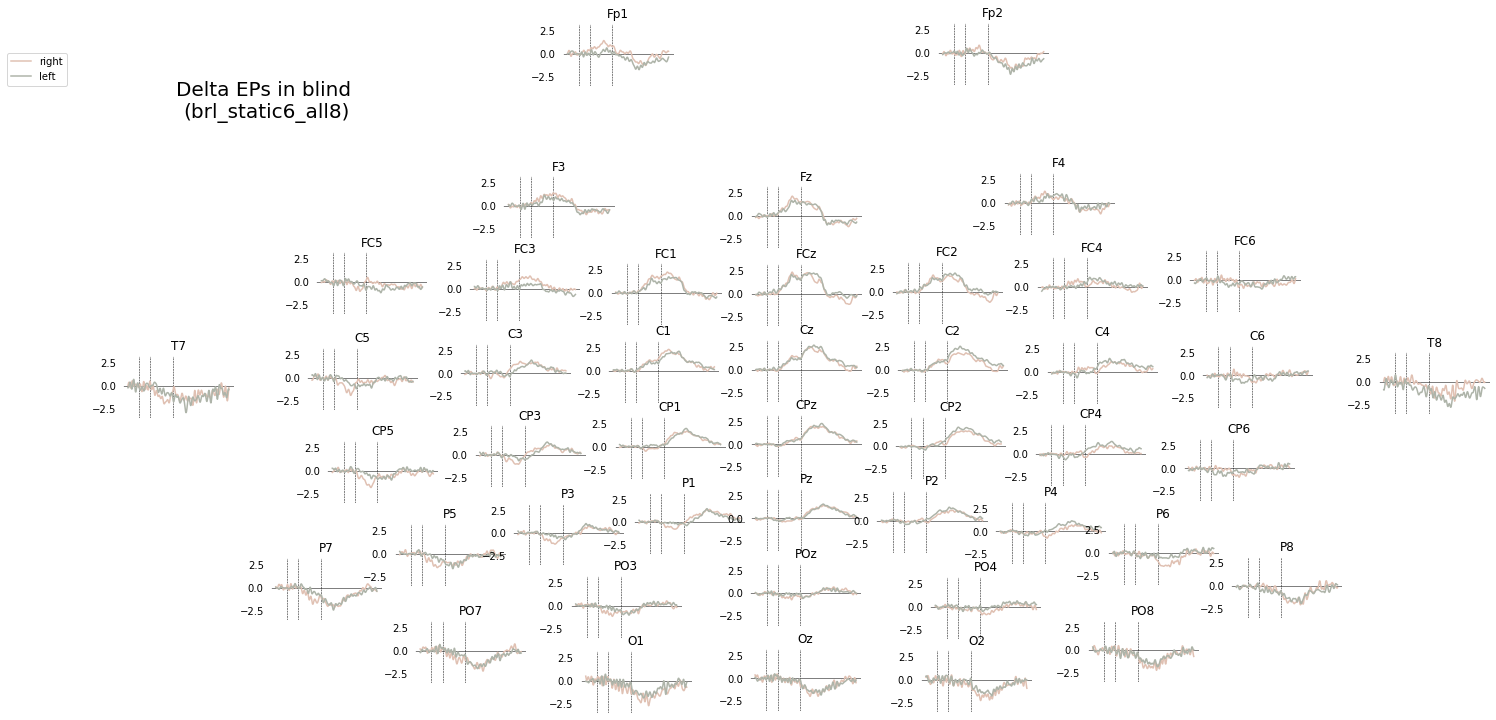

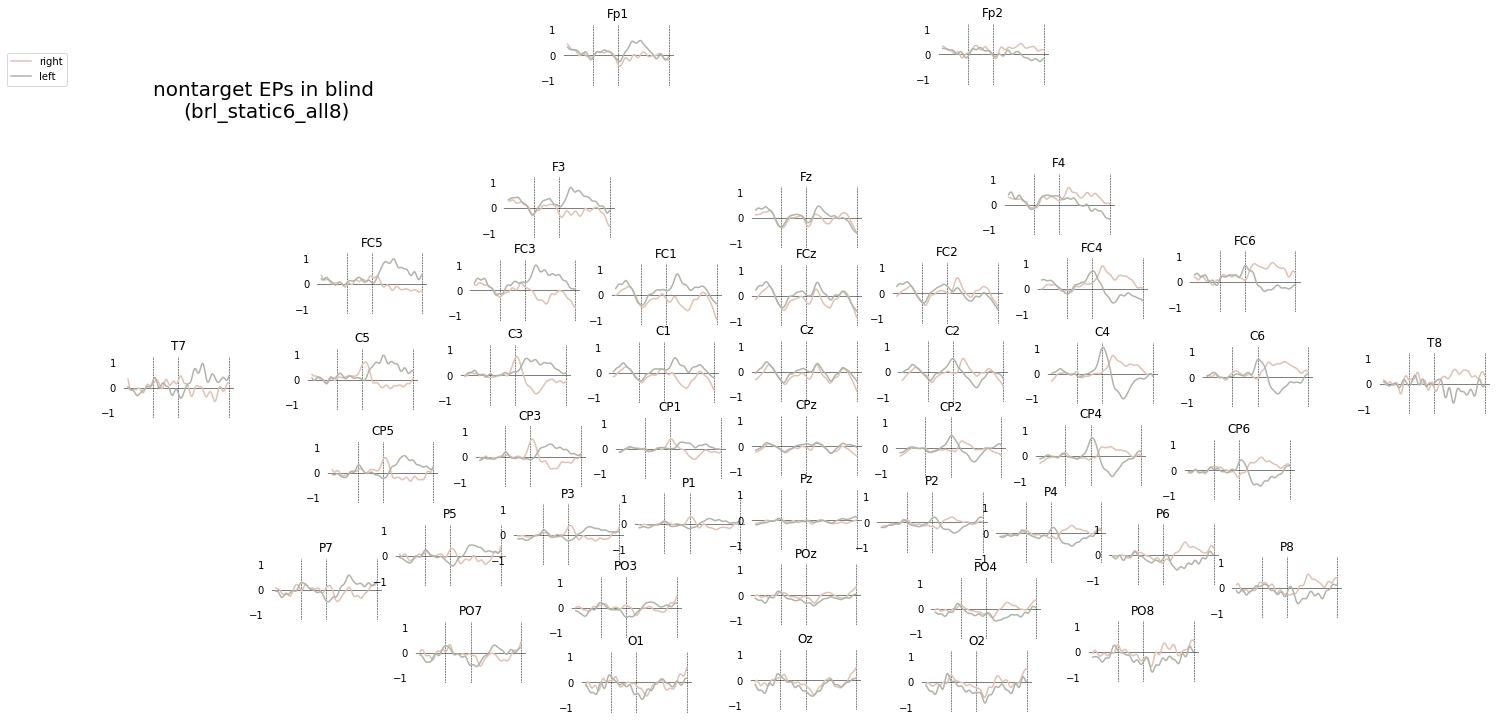

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


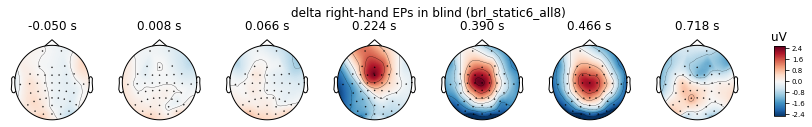

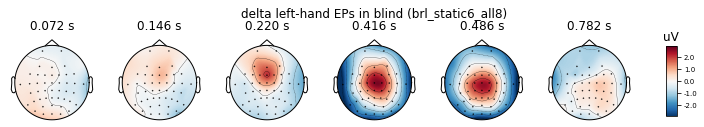

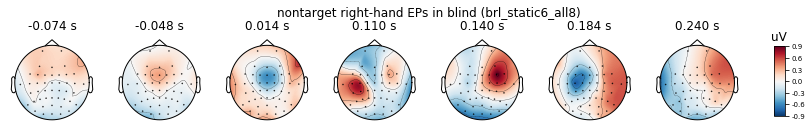

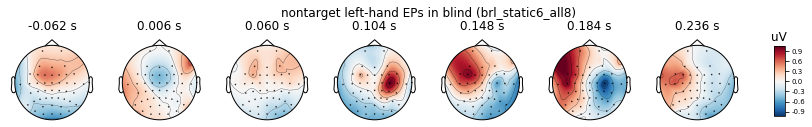

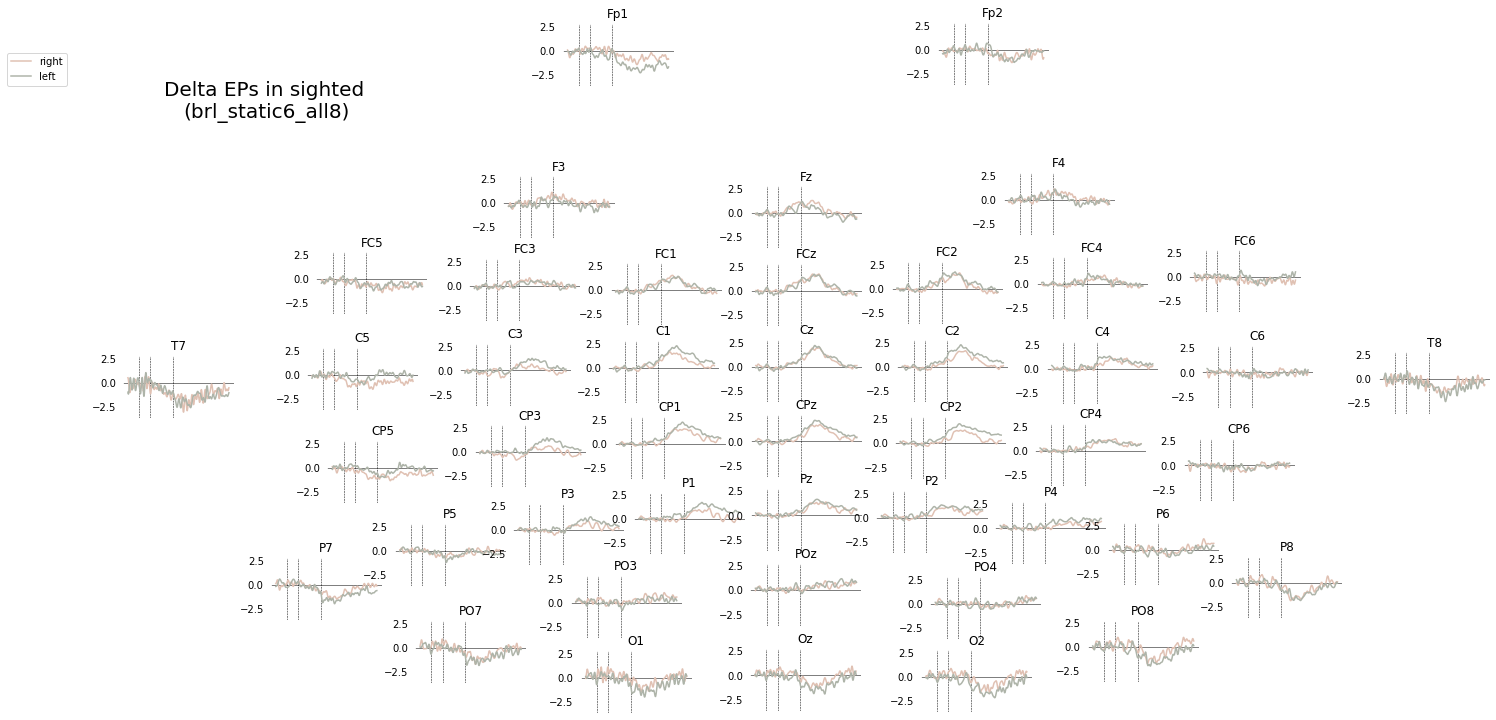

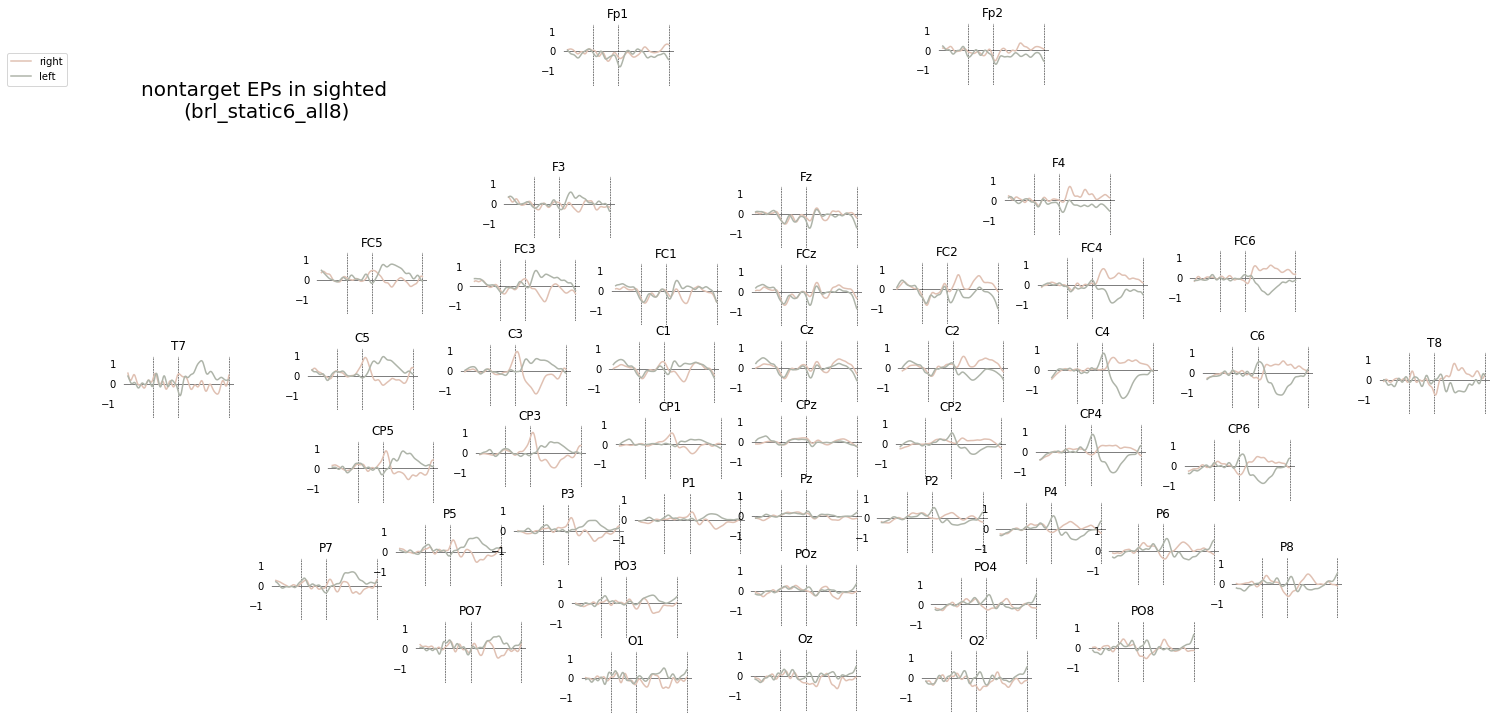

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


({'target': <Evoked  |  '' (average, N=800), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=5600), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=800), [-0.1, 0.8] sec, 45 ch, ~283 kB>},
 {'target': <Evoked  |  '' (average, N=800), [-0.1, 0.8] sec, 45 ch, ~283 kB>,
  'nontarget': <Evoked  |  '' (average, N=5600), [-0.1, 0.3] sec, 45 ch, ~195 kB>,
  'delta': <Evoked  |  '' (average, N=800), [-0.1, 0.8] sec, 45 ch, ~283 kB>})

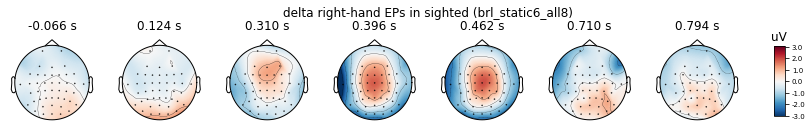

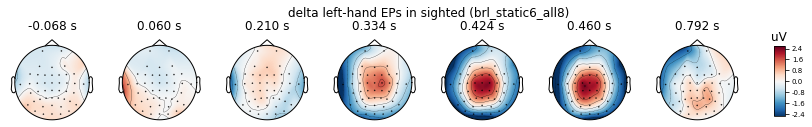

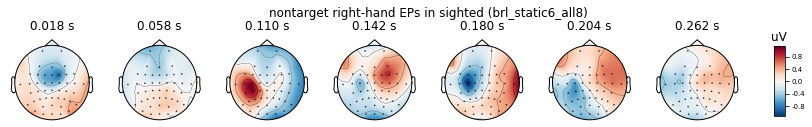

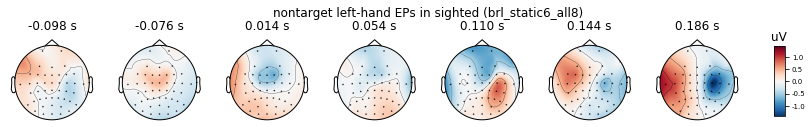

In [7]:
# right vs left hand
def hands(demography='blind', reg='brl_static6_all8', draw=True):
    demographies = {'blind':1, 'sighted':0}

    subset_rh = ds.markup.loc[ (ds.markup['blind'] == demographies[demography]) &
                                (ds.markup['reg'] == reg) &
                                (ds.markup['finger'].isin([7,6,5,4]))
                                ]
    payload_rh = aps.subset(ds, subset_rh)

    subset_lh = ds.markup.loc[ (ds.markup['blind'] == demographies[demography]) &
                                (ds.markup['reg'] == reg) &
                                (ds.markup['finger'].isin([0,1,2,3]))
                                ]
    payload_lh = aps.subset(ds, subset_lh)
    if draw:
        aps.plot_evoked_response(data={ 'right': payload_rh['delta'],
                                        'left': payload_lh['delta']},
                                        title=f'Delta EPs in {demography} \n({reg})')

        aps.plot_evoked_response(data={'right': payload_rh['nontarget'].crop(tmax=0.3),
                                        'left': payload_lh['nontarget'].crop(tmax=0.3)},
                                        title=f'nontarget EPs in {demography} \n({reg})')
        
        p = payload_rh['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'delta right-hand EPs in {demography} ({reg})')
        p.show()
        
        p = payload_lh['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'delta left-hand EPs in {demography} ({reg})')
        p.show()

        p = payload_rh['nontarget'].crop(tmax=0.3).plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'nontarget right-hand EPs in {demography} ({reg})')
        p.show()
        
        p = payload_lh['nontarget'].crop(tmax=0.3).plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
        p.suptitle(f'nontarget left-hand EPs in {demography} ({reg})')
        p.show()

    return payload_lh, payload_rh

hands(demography='blind')
hands(demography='sighted')

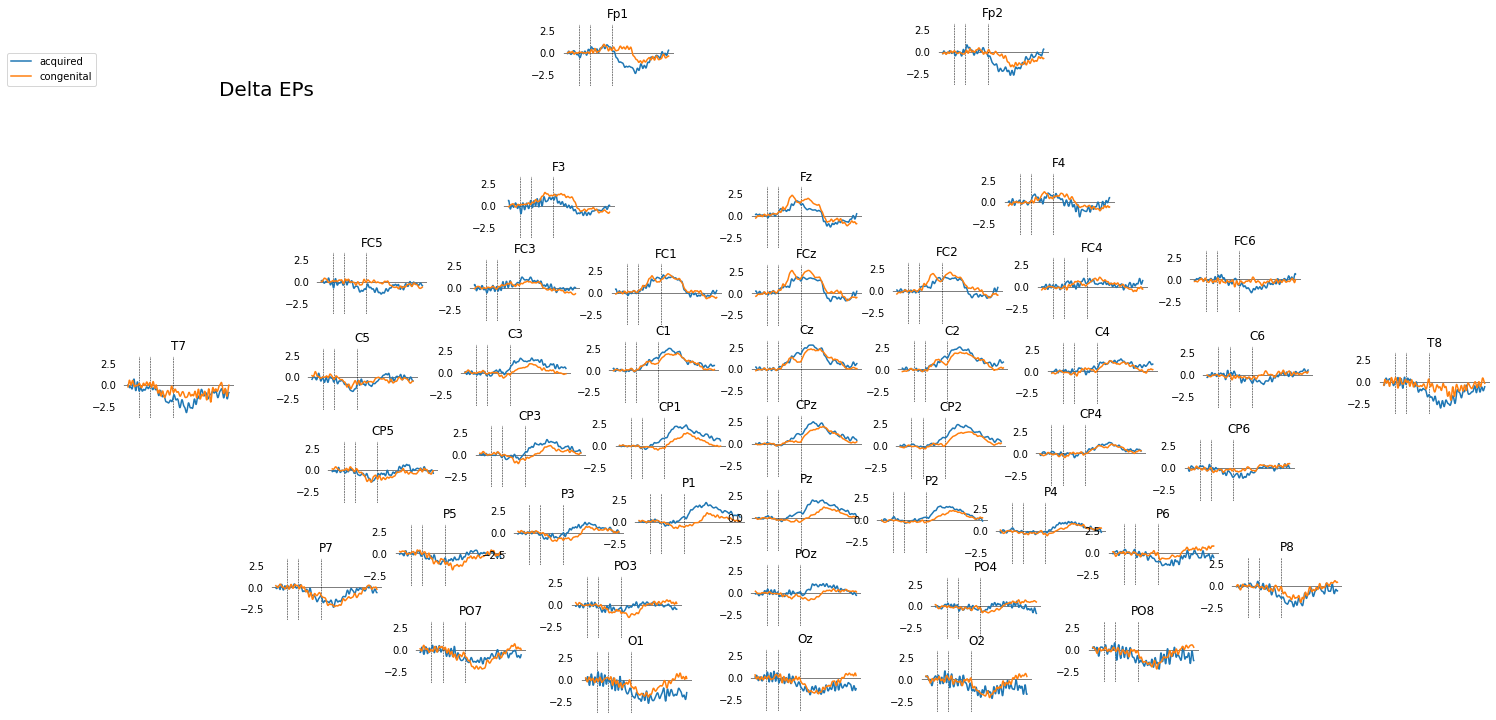

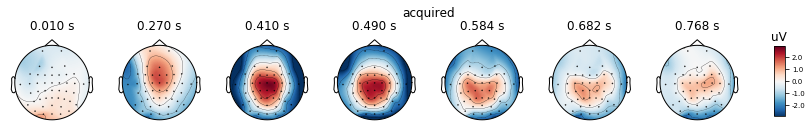

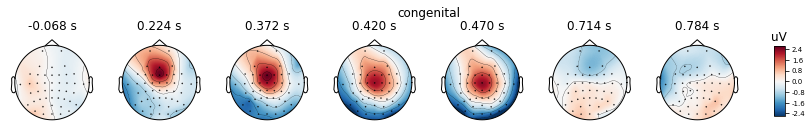

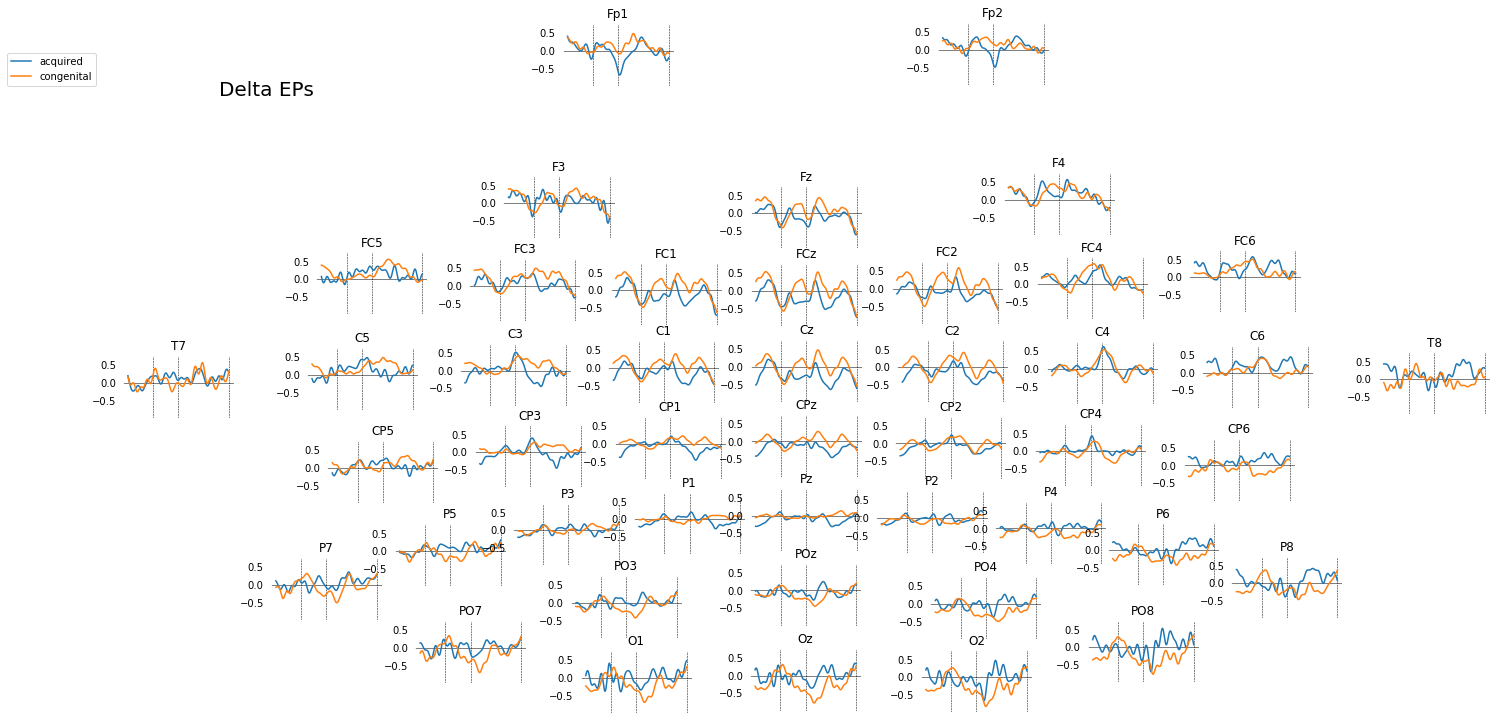

Text(0.5, 0.98, 'congenital')

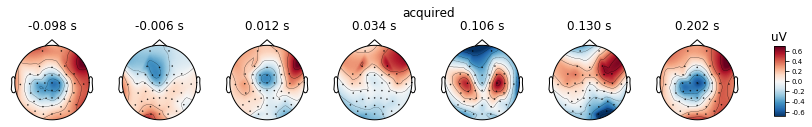

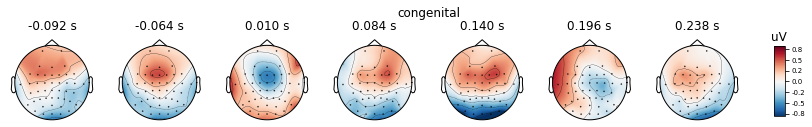

In [8]:
# congenital vs acqired blindness
subset_cb = ds.markup.loc[ (ds.markup['blind'] == 1) &
                            (ds.markup['reg'] == 'brl_static6_all8') &
                            (ds.markup['blindness_age'] == 0)
                            ]
payload_cb = aps.subset(ds, subset_cb)

subset_ab = ds.markup.loc[ (ds.markup['blind'] == 1) &
                            (ds.markup['reg'] == 'brl_static6_all8') &
                            (ds.markup['blindness_age'] != 0)
                            ]
payload_ab = aps.subset(ds, subset_ab)

aps.plot_evoked_response(data={ 'acquired': payload_ab['delta'],
                                'congenital': payload_cb['delta']},
                                title=f'Delta EPs')
payload_ab['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
plt.suptitle('acquired')
payload_cb['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)   
plt.suptitle('congenital')

aps.plot_evoked_response(data={ 'acquired': payload_ab['nontarget'].crop(tmax=0.3),
                                'congenital': payload_cb['nontarget'].crop(tmax=0.3)},
                                title=f'Delta EPs')
payload_ab['nontarget'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
plt.suptitle('acquired')
payload_cb['nontarget'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)   
plt.suptitle('congenital')

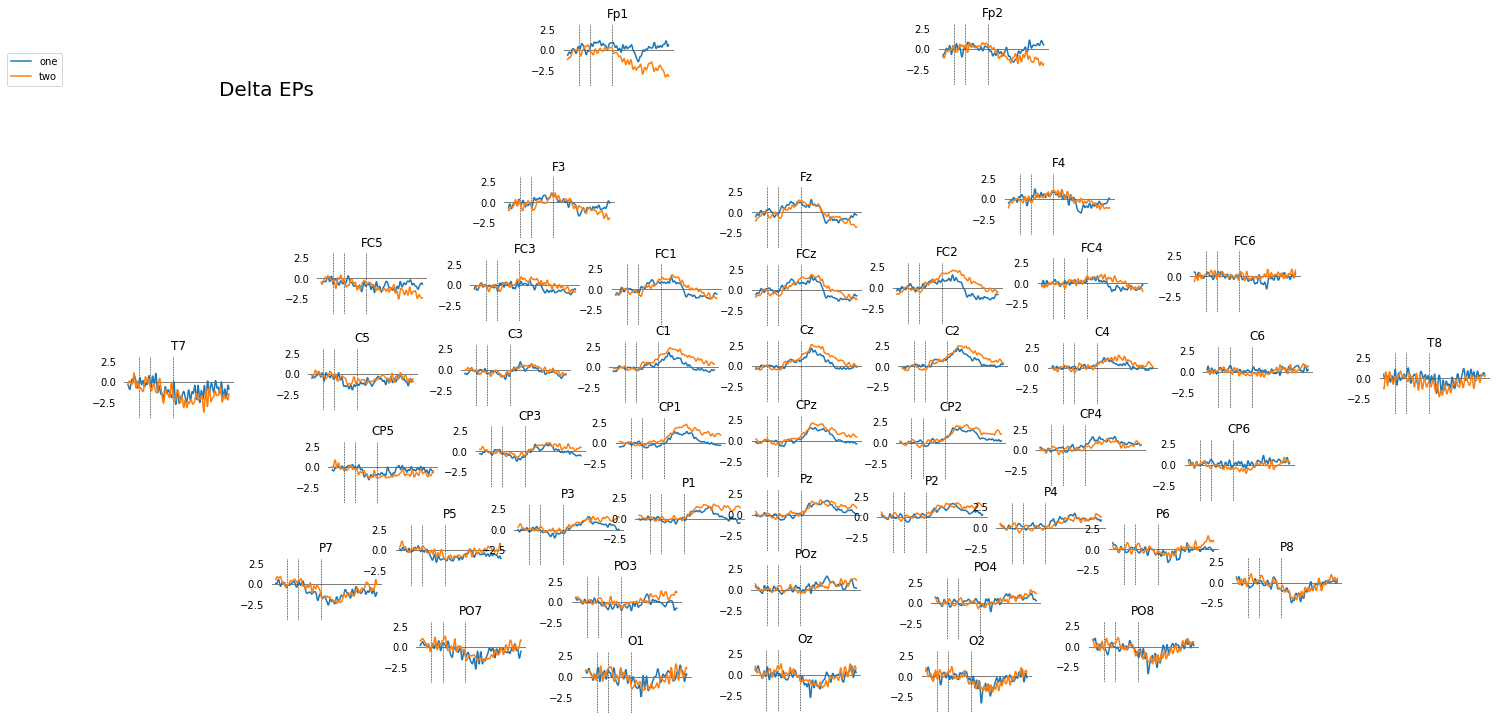

Text(0.5, 0.98, 'two')

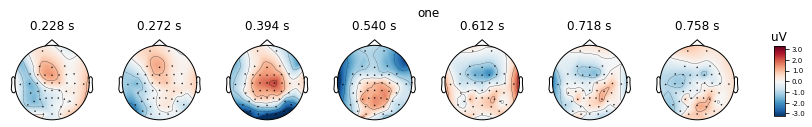

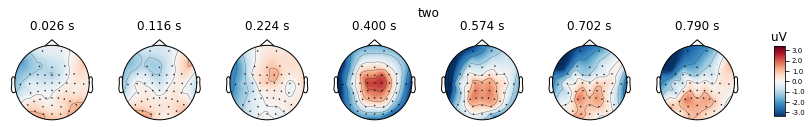

In [9]:
# first vs nonfirst target
subset_one = []
subset_two = []
for user in sorted(set(ds.markup.user)):
    for session_id in sorted(set(ds.markup.session_id)):
        ss2 = ds.markup.loc[        (ds.markup['reg'] == 'brl_static6_all8') &
                                    (ds.markup['is_target'] == 1) &
                                    (ds.markup['user'] == user) &
                                    (ds.markup.session_id == session_id)
                            ]
        subset_one.append(ss2.iloc[0])
        subset_two.append(ss2.iloc[9])
    
ss_nt = ds.markup.loc[(ds.markup['reg'] == 'brl_static6_all8') &
                      (ds.markup['is_target'] == 0)
                     ]

subset_one = pd.DataFrame(subset_one)
subset_one = pd.concat([subset_one, ss_nt])
payload_one = aps.subset(ds, subset_one)

subset_two = pd.DataFrame(subset_two)
subset_two = pd.concat([subset_two, ss_nt])
payload_two = aps.subset(ds, subset_two)


aps.plot_evoked_response(data={ 'one': payload_one['delta'],
                                'two': payload_two['delta']},
                                title=f'Delta EPs')

payload_one['target'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
plt.suptitle('one')
payload_two['target'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)   
plt.suptitle('two')